**Before running the notebook** To link Kaggle and Colab you need to have downloaded the API from kaggle (On kaggle click on the top right icon thing > account > Create new API). Once you have downloaded the API file,  you will have to add it in this notebook under files. Either upload it or drag and drop. Everytime you need to run the notebook you will have to add the downloaded API file in this notebook

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! kaggle competitions download EDSA-Movie-Recommendation-Predict

 94% 225M/239M [00:02<00:00, 126MB/s]
100% 239M/239M [00:02<00:00, 108MB/s]


In [ ]:
! unzip EDSA-Movie-Recommendation-Predict.zip

Archive:  EDSA-Movie-Recommendation-Predict.zip
  inflating: genome_scores.csv       
  inflating: genome_tags.csv         
  inflating: imdb_data.csv           
  inflating: links.csv               
  inflating: movies.csv              
  inflating: sample_submission.csv   
  inflating: tags.csv                
  inflating: test.csv                
  inflating: train.csv               


# Movie Recommendation Predict

![image info](https://user-images.githubusercontent.com/33485020/108069438-5ee79d80-7089-11eb-8264-08fdda7e0d11.jpg)

### Honour Code

Idongesit Bokeime, Ngawetu Mtirara, Daniel Uwaoma, Sibusiso Sibiya, Nonokazi Cele, Mbuyiselo Mkwanazi, Collins Kgooho and Pharis Ihaki (Team_CW3), confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.


### Problem Statement

In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

With this context, EDSA is challenging you to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity. (To be fixed, copied from kaggle)

### Objectives

1.   Explore and visualize the dataset.
2.   Clean and engineer the dataset.
3.   Build multiple models that will analyse sentiments on climate change      make the necesssary predictions.
4.   Assess the accuracy of the models.
5.   Choose the best model to make predictions.


### Table of Contents
---
1. [Introduction](#intro)
 * Background
 * Problem Statement
---
2. [Load Dependencies](#imports)
 * Connecting to Comet
 * Libraries
 * Data
 * Data Definitions
---
3. [Exploratory Data Analysis](#EDA)
 * Data Summary
 * Missing Values
 * Ratings
 * Genres
 * IMDB Metadata
---
4. [Data Preprocessing](#preprocessing)
 * Multidimensional Scaling
 * Principle Component Analysis
 * Cluster Analysis
---
5. [Modelling](#modelling)
 * Collaborative Filtering
 * Content-based Filtering
---
6. [Performance Evaluation](#evaluation)
 * Root Mean Squared Error (RMSE)
 * Cross Validation
---
7. [Model Analysis](#analysis)
 * Hyperparameter Tuning
 * Results
---
8. [Conclusion](#conclusion)
---
9. [Save Output](#ref)
---
10. [References](#save)
--- 




 <a id="two"></a>
## 1. Importing Packages

In [ ]:
# Import our regular old heroes 
import numpy as np
import pandas as pd
import scipy as sp # <-- The sister of Numpy, used in our code for numerical efficientcy. 
import matplotlib.pyplot as plt
import seaborn as sns

# Entity featurization and similarity computation
from sklearn.metrics.pairwise import cosine_similarity 
from sklearn.feature_extraction.text import TfidfVectorizer

# Libraries used during sorting procedures.
import operator # <-- Convienient item retrieval during iteration 
import heapq # <-- Efficient sorting of large lists

# Imported for our sanity
import warnings
warnings.filterwarnings('ignore')

<a id="three"></a>
### 1.1. Loading the Data
<a class="anchor" id="1.1">

In [ ]:
# Loading the data
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
movies_df = pd.read_csv('/content/movies.csv')
tags_df = pd.read_csv('/content/tags.csv')
links_df = pd.read_csv('/content/links.csv')
imdb_df = pd.read_csv('/content/imdb_data.csv')
genome_tags_df = pd.read_csv('/content/genome_tags.csv')
genome_scores_df = pd.read_csv('/content/genome_scores.csv')

NameError: ignored

<a id="section-two"></a>
## 2. Dataset at a glance

In [ ]:
#function that displays the first five raws of a data frame
def display_df(df):
    '''This functions takes in a dataframe and returns the first five raws of it'''
    return df.head()

In [ ]:
#define a function that displays the information of a df
def display_info(df):
    '''This function takes in a dataframe and  returns the information about a dataframe'''
    return df.info()

In [ ]:
#define a data frame summary statistic function
def summary_stat(df):
    '''This function takes a dataframe and returns the summary statistics of all numerical columns'''
    return df.describe()

In [ ]:
# define a function for checking missing values
def missing_val(df):
    '''A function that checks for missing values per column when passing in a dataframe
    and returns the count of missing values in each column'''
    # Count total NaN at each column in a DataFrame
    count = print(" \nCount total NaN at each column in a DataFrame : \n\n",
              df.isnull().sum())
    return count

In [ ]:
# Load imdb data.
#import pandas as pd
#pd.set_option('display.max_columns', None)

imdb_df = pd.read_csv('imdb_data.csv')
print(imdb_df.shape)
imdb_df.head()

(27278, 6)


,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [ ]:
# Load movies data.

movies_df = pd.read_csv('movies.csv')
print(movies_df.shape)
movies_df.head()

(62423, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
# Inner join movies and imdb dataset to ensure we are working with the same set of movies
main_df = movies_df.merge(imdb_df, how = 'inner', on = ['movieId'])
print(main_df.shape)
main_df.head()

(24866, 8)


,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Jumanji (1995),Adventure|Children|Fantasy,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Grumpier Old Men (1995),Comedy|Romance,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Father of the Bride Part II (1995),Comedy,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [ ]:
# Getting to know our dataset
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24866 entries, 0 to 24865
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        24866 non-null  int64  
 1   title          24866 non-null  object 
 2   genres         24866 non-null  object 
 3   title_cast     15201 non-null  object 
 4   director       15347 non-null  object 
 5   runtime        13521 non-null  float64
 6   budget         7283 non-null   object 
 7   plot_keywords  14384 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 1.7+ MB


Average movie runtime: 101.36661489534798


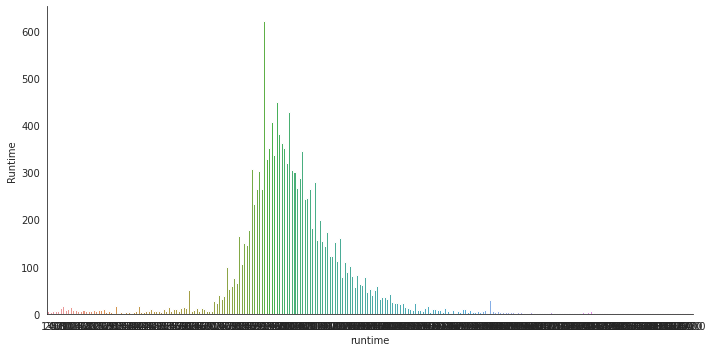

In [ ]:
# Ploting our runtime to see the distribution
with sns.axes_style('white'):
    g = sns.factorplot("runtime", data=main_df, aspect=2.0,kind='count')
    g.set_ylabels("Runtime")
print (f'Average movie runtime: {np.mean(main_df["runtime"])}')

The movies are distributed mostly at the center (averagely 103 minutes).
Dropping the outliers.

In [ ]:
# Extract movies with runtime between 60 and 150 minutes which we believe has the most of the movies.
# also elimiante outliers in this regards.
main_df = main_df[(main_df.runtime >= 60) & (main_df.runtime <= 150)]
main_df.shape

(12739, 8)

In [ ]:
#  Seperating the year from the title feature
main_df['year'] = movies_df['title'].str[-5:-1]#.astype(int)
main_df['title'] = movies_df['title'].str[:-6]
main_df.head()

,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,1995
1,2,Jumanji,Adventure|Children|Fantasy,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game,1995
2,3,Grumpier Old Men,Comedy|Romance,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...,1995
4,5,Father of the Bride Part II,Comedy,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion,1995


In [ ]:
# Fill the null values of director and title_cast with '[]'.
main_df.director.fillna('[]', inplace=True)
main_df.title_cast.fillna('[]', inplace=True)
main_df.plot_keywords.fillna('[]', inplace=True)

# Drop the irrelevant attributes.
main_df.drop(['budget'],
               axis=1, inplace=True)
print(main_df.shape)
main_df.head()


(12739, 8)


,movieId,title,genres,title_cast,director,runtime,plot_keywords,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,toy|rivalry|cowboy|cgi animation,1995
1,2,Jumanji,Adventure|Children|Fantasy,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,board game|adventurer|fight|game,1995
2,3,Grumpier Old Men,Comedy|Romance,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,boat|lake|neighbor|rivalry,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,black american|husband wife relationship|betra...,1995
4,5,Father of the Bride Part II,Comedy,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,fatherhood|doberman|dog|mansion,1995


In [ ]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12739 entries, 0 to 24865
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        12739 non-null  int64  
 1   title          12739 non-null  object 
 2   genres         12739 non-null  object 
 3   title_cast     12739 non-null  object 
 4   director       12739 non-null  object 
 5   runtime        12739 non-null  float64
 6   plot_keywords  12739 non-null  object 
 7   year           12739 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 895.7+ KB


In [ ]:
# Export main_df to movies_metadata_cleaned.csv file.
#import os
#newpath = r"data_cleaned"
#if not os.path.exists(newpath):
#    os.makedirs(newpath)
#main_df.to_csv(newpath + "/movies_metadata_cleaned.csv", index=False)

In [ ]:
movies_ohe = main_df.copy()

In [ ]:
# Load genome data.

genomes_df = pd.read_csv('genome_scores.csv')
print(genomes_df.shape)
genomes_df.head()

(15584448, 3)


,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [ ]:
# Load genome data.

genomet_df = pd.read_csv('genome_tags.csv')
print(genomet_df.shape)
genomet_df.head()

(1128, 2)


,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [ ]:
# Inner join genome_tag and genome_scores dataset to ensure we are working with the same set of movies
genomemain_df = genomes_df.merge(genomet_df, how = 'inner', on = ['tagId'])
print(genomemain_df.shape)
genomemain_df.head()

(15584448, 4)


,movieId,tagId,relevance,tag
0,1,1,0.02875,007
1,2,1,0.04125,007
2,3,1,0.04675,007
3,4,1,0.03425,007
4,5,1,0.04300,007


In [ ]:
# Extract genomemain based on the movies left in the movies_ohe and the relavance should be >= 0.4 out of 1.0
genomemain_df = genomemain_df[(genomemain_df.movieId.isin(movies_ohe.movieId)) & (genomemain_df.relevance >= 0.4)]

# Sort ratings_df by userId and timestamp, then drop the rating and timestamp attributes.
genomemain_df.sort_values(by=['tagId'], ignore_index=True, inplace=True)
genomemain_df.drop(['relevance', 'tag'], axis=1, inplace=True)
print(genomemain_df.shape)
genomemain_df.head()

(485092, 2)


,movieId,tagId
0,10,1
1,6946,1
2,7725,1
3,8605,1
4,8968,1


In [ ]:
# Group all movieId by tagId for association rules mining
genomemain_all = genomemain_df.groupby("tagId")["movieId"].apply(list).reset_index()
print(genomemain_all.shape)
genomemain_all.head()

(1126, 2)


,tagId,movieId
0,1,"[10, 6946, 7725, 8605, 8968, 41716, 45186, 485..."
1,2,"[60072, 60397, 63113, 72178, 84844, 115149, 96..."
2,3,"[43460, 51991, 45880, 48997, 51834, 52448, 606..."
3,4,"[63062, 89904, 59387, 67429, 68963, 86882, 908..."
4,5,"[39292, 31539, 32352, 33124, 33660, 33722, 377..."


In [ ]:
# Load tags data.

tags_df = pd.read_csv('tags.csv')
print(tags_df.shape)
tags_df.head()

(1093360, 4)


,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [ ]:
# Extract tags based on the movies left in the movies_ohe
tags_df = tags_df[(tags_df.movieId.isin(movies_ohe.movieId))]

# Sort tags_df by userId and timestamp, then drop the tags and timestamp attributes.
tags_df.sort_values(by=['userId', 'timestamp'], ignore_index=True, inplace=True)
tags_df.drop(['tag', 'timestamp'], axis=1, inplace=True)
print(tags_df.shape)
tags_df.head()

(604397, 2)


,userId,movieId
0,4,115569
1,4,1732
2,4,1732
3,4,44665
4,43,434


In [ ]:
# Group all movieId by userId for association rules mining
tags_all = tags_df.groupby("userId")["movieId"].apply(list).reset_index()
print(tags_all.shape)
tags_all.head()

(11076, 2)


,userId,movieId
0,4,"[115569, 1732, 1732, 44665]"
1,43,[434]
2,68,[3481]
3,87,"[79132, 104841, 102445, 102445, 102445, 6537, ..."
4,91,"[71033, 71033, 71033, 71033, 71033, 71033, 105..."


### Clean Train Dataset

In [ ]:
# Load train data.

train_df = pd.read_csv('train.csv')
print(train_df.shape)
train_df.head()

(10000038, 4)


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


Average rating in dataset: 3.5333951730983424


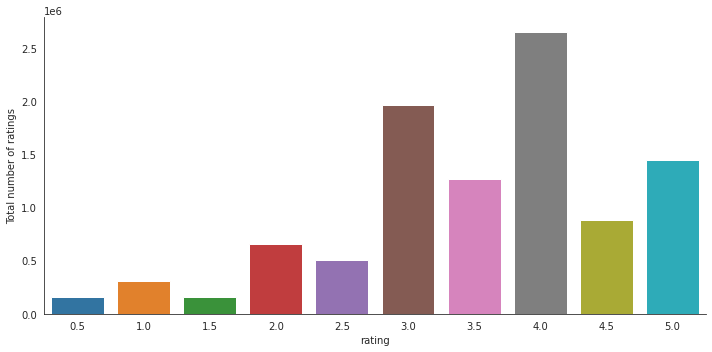

In [ ]:
with sns.axes_style('white'):
    g = sns.factorplot("rating", data=train_df, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")
print (f'Average rating in dataset: {np.mean(train_df["rating"])}')

In [35]:
# Extract ratings based on the movies left in the movies_ohe and the ratings should be at least 3.5 (out of 5).
train_df = train_df[(train_df.movieId.isin(movies_ohe.movieId)) & (train_df.rating >= 3.5)]

# Sort ratings_df by userId and timestamp, then drop the rating and timestamp attributes.
train_df.sort_values(by=['userId', 'timestamp'], ignore_index=True, inplace=True)
train_df.drop(['rating', 'timestamp'], axis=1, inplace=True)
print(train_df.shape)
train_df.head()

(3811242, 2)


,userId,movieId
0,1,3949
1,1,1175
2,1,2843
3,1,7365
4,1,4973


In [36]:
# Group all movieId by userId for association rules mining
train_all = train_df.groupby("userId")["movieId"].apply(list).reset_index()
print(train_all.shape)
train_all.head()

(160289, 2)


,userId,movieId
0,1,"[3949, 1175, 2843, 7365, 4973, 6016, 7323, 695..."
1,2,"[1653, 5445, 151, 236, 4886, 333, 4299, 1488, ..."
2,3,"[593, 2571, 30793, 41566, 112552, 116797, 4306..."
3,4,"[97913, 101864, 107406, 93838, 49272, 8961, 10..."
4,5,"[150, 32, 216, 340, 50, 593, 350, 47, 356, 141..."


<a id="section-two"></a>
## 3. Exploratory data analysis

<a id="section-two"></a>
## 4. Feature Engineering

<a id="section-two"></a>
## 5. Recommender Systems

<a id="three"></a>
### 5.1. Content Filtering-Based Recommender System
<a class="anchor" id="1.1">

<a id="three"></a>
### 5.2. Collaborative Filtering-Based Recommender System
<a class="anchor" id="1.1">

<a id="section-six"></a>
## 6. Model evaluation

<a id="section-seven"></a>
## 7. Model Selection 

<a id="section-seven"></a>
## 8. Conclusion

<a id="section-eight"></a>
## 9. Submission

<a id="three"></a>
### 9.1. Creating pickle files of the models
<a class="anchor" id="1.1">

<a id="three"></a>
### 9.2.  Creating kaggle submission file
<a class="anchor" id="1.1">

<a id="section-nine"></a>
## 10. References 